### Introduction to Classification Neural Network with TensorFlow

There are three types of Classification:
- Binary classification
- Multiclass classification:
- Multilabel classification:

### Creating data from sklearn datasets

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

#Initializing dataset
iris_data = load_iris()

# Reading the dataset
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Creating target column
df["class"] = iris_data.target

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
df["class"].unique()

array([0, 1, 2])

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into X and y
X = df.drop("class",axis=1)
y = df["class"]

# Building train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Making sure the sizes of the dataset
X_train.shape, X_test.shape

((135, 4), (15, 4))

Steps to build a neural network classification model

1. Create or import a model
2. Compile the model
3. Fit and Train the model
4. Evaluate the model
5. Tweak a model


In [37]:
# Before building a model, we need to scale the dataset or normilize the data
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# Initializing the scaler
scaler = StandardScaler()

# Fitting and Transforming Train
X_train = scaler.fit_transform(X_train)

# Fitting and Transforming Test
X_test = scaler.fit_transform(X_test)


# Seed a random seed
tf.random.set_seed(42)

# 1.Create a model
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],) ),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

# 2. Compile the model 
iris_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=["accuracy"])

# 3.Fit the model with train set to make a learn
history = iris_model.fit(X_train, y_train, epochs=200,validation_split=0.2, verbose=2)


Epoch 1/200


C:\Users\baxti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 3s - 784ms/step - accuracy: 0.5926 - loss: 0.7927 - val_accuracy: 0.8519 - val_loss: 0.4864
Epoch 2/200
4/4 - 0s - 87ms/step - accuracy: 0.8241 - loss: 0.3938 - val_accuracy: 0.8889 - val_loss: 0.3649
Epoch 3/200
4/4 - 0s - 82ms/step - accuracy: 0.8241 - loss: 0.2813 - val_accuracy: 0.9259 - val_loss: 0.3031
Epoch 4/200
4/4 - 0s - 58ms/step - accuracy: 0.9167 - loss: 0.1834 - val_accuracy: 0.9630 - val_loss: 0.2526
Epoch 5/200
4/4 - 0s - 27ms/step - accuracy: 0.9537 - loss: 0.1196 - val_accuracy: 0.9630 - val_loss: 0.2089
Epoch 6/200
4/4 - 0s - 46ms/step - accuracy: 0.9630 - loss: 0.0762 - val_accuracy: 0.9630 - val_loss: 0.2185
Epoch 7/200
4/4 - 0s - 23ms/step - accuracy: 0.9444 - loss: 0.0647 - val_accuracy: 0.9630 - val_loss: 0.1573
Epoch 8/200
4/4 - 0s - 23ms/step - accuracy: 0.9722 - loss: 0.0554 - val_accuracy: 0.9259 - val_loss: 0.2409
Epoch 9/200
4/4 - 1s - 182ms/step - accuracy: 0.9722 - loss: 0.0557 - val_accuracy: 0.9630 - val_loss: 0.1480
Epoch 10/200
4/4 - 0s - 39ms/

Text(0.5, 0, 'epochs')

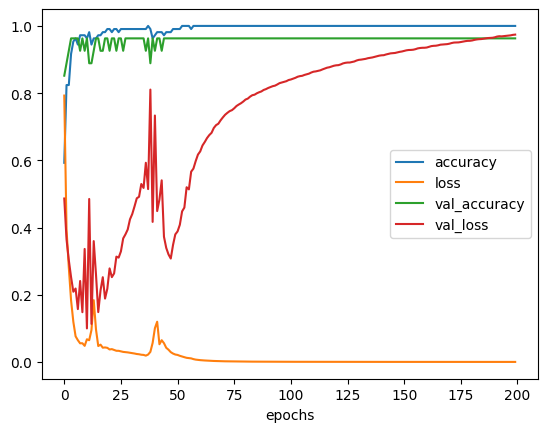

In [38]:
import matplotlib.pyplot as plt

# Ploting the learing curve
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")


## Evaluate the model

In [41]:
# Evaluatet the model on the test data
test_loss, test_accuracy= iris_model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9333 - loss: 0.3595
Test Accuracy: 0.9333
